# Titanic Survivability Prediction

## <span style="color:blue">Import libraries </span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Load .csv 'train' and 'test'

In [2]:
tacos, nachos = pd.read_csv('/kaggle/input/train-csv/train.csv'),pd.read_csv('/kaggle/input/test-csv/test.csv')

## <span style="color:green">Analyzing the data</span>

In [3]:
tacos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
nachos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
tacos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tacos.shape

(891, 12)

In [7]:
nachos.shape

(418, 11)

In [8]:
tacos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
nachos.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
tacos['Age'].median(), tacos['Age'].mean()

(28.0, 29.69911764705882)

In [11]:
nachos['Age'].median(), nachos['Age'].mean()

(27.0, 30.272590361445783)

In [12]:
tacos['Survived'].mean()

0.3838383838383838

In [13]:
tacos[tacos['Sex']=='female']['Age'].median(), tacos[tacos['Sex']=='female']['Age'].mean()

(27.0, 27.915708812260537)

In [14]:
tacos[tacos['Sex']=='male']['Age'].median()

29.0

In [15]:
tacos[tacos['Sex']=='male']['Survived'].sum()

109

In [16]:
tacos[tacos['Sex']=='female']['Survived'].sum()

233

### <FONT COLOR="purple"> Adding visualizations for a better grasp of the tacos ('Train') dataset </FONT>

Sex


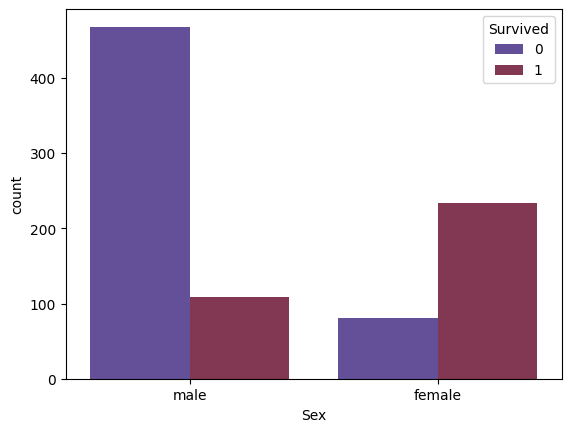


Embarked


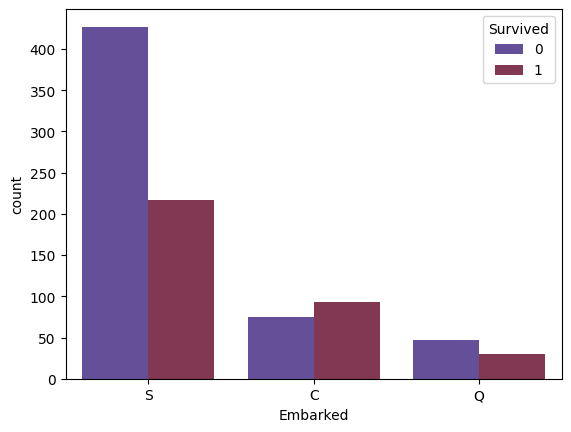


Pclass


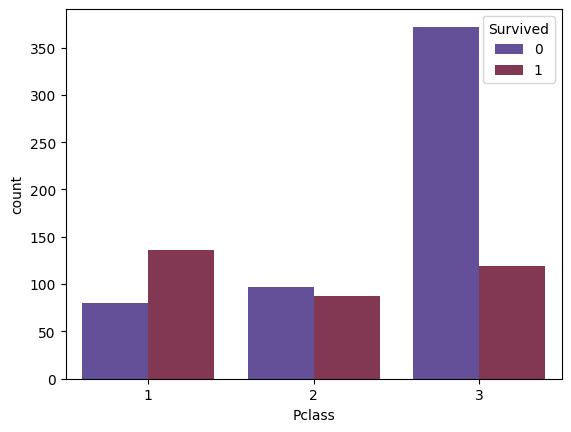


SibSp


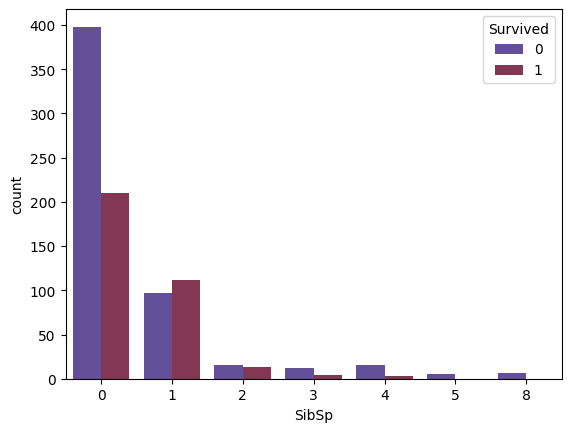


Parch


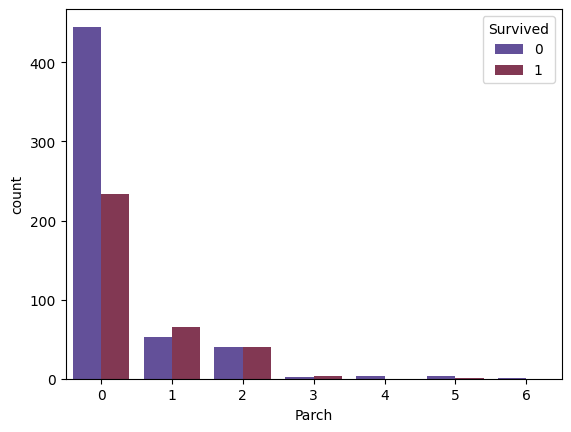

In [17]:
for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=tacos, x=column_name, hue='Survived', palette='twilight')
    plt.show()
    print("")

### <FONT COLOR = "light purple"> 
~ We can see that more women survived than the men. 124 more woman suvived which makes sense as they had the women and children board the life boats first.
    
~The visualizations shows the demographic of the people who survived in this dataset</FONT>

#### <FONT COLOR = 'rainbow'> Fare seems to have a factor in surviviblity </FONT>

In [18]:
fare = [0, 50, 100, 200, 300, 400, 500, 550]
fare_labels = ['$0-49','$50-99','$100-199','$200-299','$300-399','$400-499','$500-550']

tacos ["Passenger Fare"] = pd.cut(tacos['Fare'], bins=fare, labels=fare_labels, right=False, include_lowest=True)
plt.show()

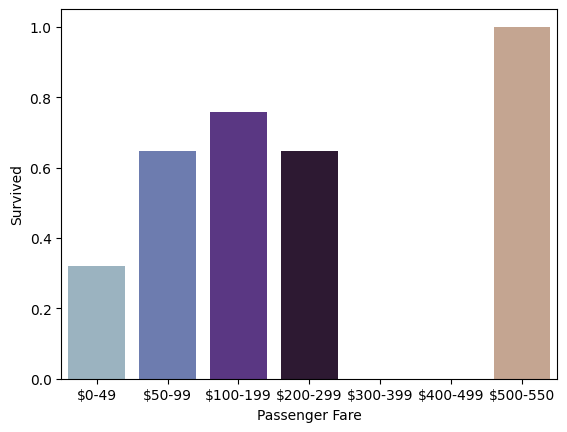

In [19]:
survived_to_fare = tacos.groupby('Passenger Fare')['Survived'].mean()
survived_to_fare_by_range = survived_to_fare.reset_index()

sns.barplot(data=survived_to_fare_by_range, x='Passenger Fare', y='Survived', palette='twilight')
plt.show()

#### <FONT COLOR="teal"> **Adding in the fare based on survival for tacos dataset** </FONT>

# <FONT COLOR="magenta"> Data Cleaning and Manipulation</FONT>

Replacing Female with "1" and Male for "0", to make it easier to read.

In [20]:
tacos['Survived'].replace(['Female','Male'], [1,0], inplace=True)
tacos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,$0-49
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,$50-99
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,$0-49
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,$50-99
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,$0-49


In [21]:
tacos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Passenger Fare'],
      dtype='object')

In [22]:
tacos.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Passenger Fare'], axis=1, inplace=True)
tacos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [23]:
nachos1 = pd.DataFrame(nachos)
nachos1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
nachos1['Age'].fillna(nachos1['Age'].median(), inplace=True)
nachos1['Embarked'].fillna(nachos1['Embarked'].mode(), inplace=True)
nachos1['Fare'].fillna(nachos1['Fare'].mean(), inplace=True)

nachos.duplicated().sum()

0

In [25]:
nachos1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [26]:
nachos1.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
nachos1.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [27]:
tacos.replace({'female':1, 'male':0}, inplace=True)
tacos.replace({'S':1, 'C':2, 'Q':3}, inplace=True)
tacos.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,1.0
1,1,1,1,38.0,71.2833,2.0
2,1,3,1,26.0,7.9250,1.0
3,1,1,1,35.0,53.1000,1.0
4,0,3,0,35.0,8.0500,1.0


# <FONT COLOR='rainbow'> Checking for correlations </FONT>

#### and comparisons of survivabliity with the mean of each variable (Pclass, Sex, Age, Fare and embarked)

In [28]:
taco = tacos.corr()
taco.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,0.096067,0.012186
Fare,0.257307,-0.549500,0.182333,0.096067,1.000000,0.063462


<Axes: >

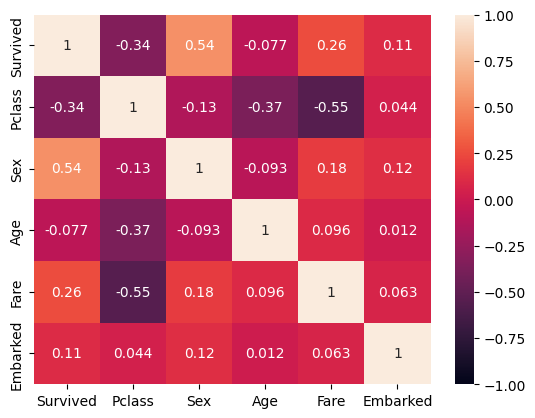

In [29]:
sns.heatmap((taco), vmin=-1, vmax=1, annot=True)

In [30]:
taco_pivot = pd.pivot_table(tacos, index = 'Survived', values = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])
taco_pivot

,Age,Embarked,Fare,Pclass,Sex
Survived,,,,,
0,30.626179,1.307832,22.117887,2.531876,0.147541
1,28.343690,1.450000,48.395408,1.950292,0.681287


In [31]:
guest = tacos.loc[tacos.Pclass == 1]['Survived']
guest_1class = sum(guest)/len(guest)
print ("Percentage of 1st Class who survived:", guest_1class)

Percentage of 1st Class who survived: 0.6296296296296297


In [32]:
guest2 = tacos.loc[tacos.Pclass == 2]['Survived']
guest_2class = sum(guest2)/len(guest2)
print ("Percentage of 2nd Class who survived:", guest_2class)

Percentage of 2nd Class who survived: 0.47282608695652173


In [33]:
guest3 = tacos.loc[tacos.Pclass == 3]['Survived']
guest_3class = sum(guest3)/len(guest3)
print ("Percentage of 3rd Class who survived:", guest_3class)

Percentage of 3rd Class who survived: 0.24236252545824846


# <FONT COLOR= 'rainbow'> Building... </FONT>

Before processing the data into a model, we need to fill in missing values in both datasets.
Focusing on the following:
Pclass, Sex, and Fare. These variables seem to play a big factor in surviving the Titanic.
Being a woman had an impact of surviving the Titanic. Mostly due to the values and upbringings of the guests.

In [34]:
features = ["Pclass", "Sex", "Fare"]

X_train = tacos[features].copy()

fare_median = X_train["Fare"].median()

X_train["Fare"].fillna(fare_median, inplace=True)
X_train = pd.get_dummies(X_train, drop_first=True)

X_test = nachos1[features].copy()

X_test["Fare"].fillna(fare_median, inplace=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train.head()

,Pclass,Sex,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500


# <FONT COLOR = "rainbow"> Creating the Model... </FONT>

### Cross-Validation:

In [35]:
# Cross validation 
y_train = tacos["Survived"]

rfcmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

cv_scores = cross_val_score(rfcmodel, X_train, y_train, cv=5)
rf_avg_cv_score = cv_scores.mean()

print("Random Forest:")
print("Cross-validation scores:", cv_scores)
print("Average score:", cv_scores.mean())

Random Forest:
Cross-validation scores: [0.77094972 0.79213483 0.83146067 0.79775281 0.80898876]
Average score: 0.8002573598644153


### Logistic Regression:

In [36]:
lr_model = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr_model,X_train,y_train,cv=5)
lr_avg_cv_score = cv.mean()

print("Logistic Regression:")
print(cv)
print(cv.mean())

Logistic Regression:
[0.79329609 0.80337079 0.76966292 0.75842697 0.78651685]
0.7822547234950725


# <FONT COLOR='rainbow'> Predicition...</FONT>

In [37]:
if rf_avg_cv_score > lr_avg_cv_score:
    print("Random Forest has a higher CV score.")
    selected_model = rfcmodel
else:
    print("Logistic Regression has a higher CV score.")
    selected_model = lr_model
    
selected_model.fit(X_train, y_train)
model_predictions = selected_model.predict(X_test)

Random Forest has a higher CV score.


In [38]:
output = pd.DataFrame({'PassengerId': nachos.PassengerId, 'Survived': model_predictions})
output.to_csv('submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
